# **Predicting the Chance of Breast Cancer**

### **1) Defining the Problem and objectives**
**1.1 Problem:** Breast cancer is a significant health concern worldwide, and early detection plays a crucial role in improving survival rates. The project aims to develop predictive models to assess the likelihood of breast cancer based on relevant features from a given dataset.

**1.2 Objectives:**
*   Data Collection/preparation
*   Performing EDA
*   Data Pre-Proccessing
*   Model Training
*   Reporting


### **2) Data Collection/Preparation**
**2.1 Data Collection:**
The project will utilize the Breast Cancer Dataset available on Kaggle. This dataset is a comprehensive collection of features related to breast cancer. The dataset provides a valuable foundation for training and evaluating machine learning models for breast cancer prediction. The link to the dataset is https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/data.

**2.2) Data Preparation**

I asked chat gpt to write me the code to some of the most commonly used libraries in the data science and visualization field. Of the ones mentioned I chose to pick Numpy, Pandas, Matplotlib and Seaborn as these libraries will be of use to me in this study.
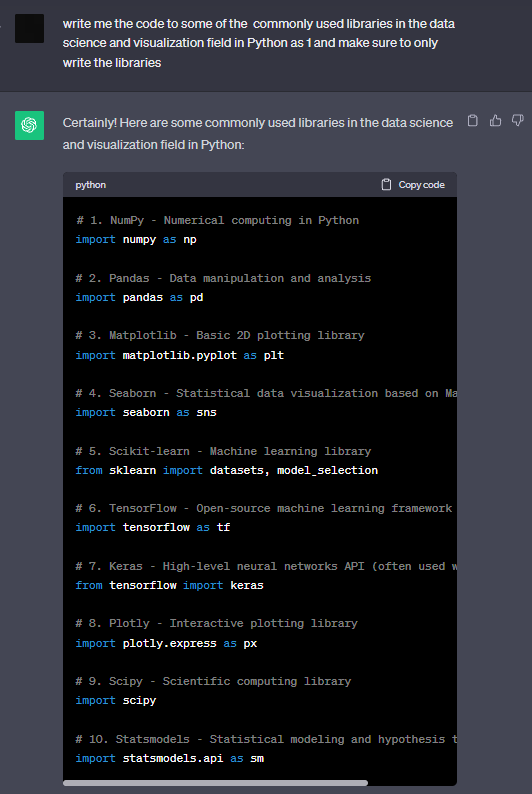

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Now after choosing the libraries, the next step is to load the dataset into a Pandas DataFrame using:

In [149]:
df = pd.read_csv('/content/sample_data/breast-cancer.csv')

Lets get an idea on how the dataset looks like using:

In [150]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This shows the first 5 rows of the dataset.

Now is time to check for missing values in the dataset and unique counts.

In [151]:
def find_nulls(data:pd.DataFrame) -> pd.DataFrame:
    temp = {'columns':[],'nulls':[],'nulls_%':[],'unique':[]}
    nulls = data.isnull().sum()
    temp['columns'] = nulls.axes[0]
    temp['nulls'] = nulls.values
    temp['nulls_%'] = nulls.values*100/data.shape[0]
    for i in nulls.axes[0]:
        temp['unique'].append(data[i].unique().shape[0])
    temp = pd.DataFrame(temp)
    return temp.sort_values('nulls')
find_nulls(df).style.background_gradient(cmap='Blues')

,columns,nulls,nulls_%,unique
0,id,0,0.000000,569
29,concave points_worst,0,0.000000,492
28,concavity_worst,0,0.000000,539
27,compactness_worst,0,0.000000,529
26,smoothness_worst,0,0.000000,411
25,area_worst,0,0.000000,544
24,perimeter_worst,0,0.000000,514
23,texture_worst,0,0.000000,511
22,radius_worst,0,0.000000,457
21,fractal_dimension_se,0,0.000000,545


This shows that there is no missing values in the data set.

Next step is to clean the data to do so we run:

In [152]:
df = df.drop_duplicates()

That line checks for and handle any inconsistencies or errors in the data and removes duplicates if necessary.

### **3) Performing EDA**
EDA stands for Exploratory data analysis.

To perform EDA:
1.   Datatypes of Features and Output Variable
2.   Number of Unique Entries in Each Column
3.   Checking statistics of the dataset
4.   Various visual representations for dataset understanding

  4.1. Histograms for numerical variables

  4.2. Box plots for numerical vs. categorical variables

5. Understand the relationships between different features in the dataset.
For this part I asked chatgpt for help with the code for each part


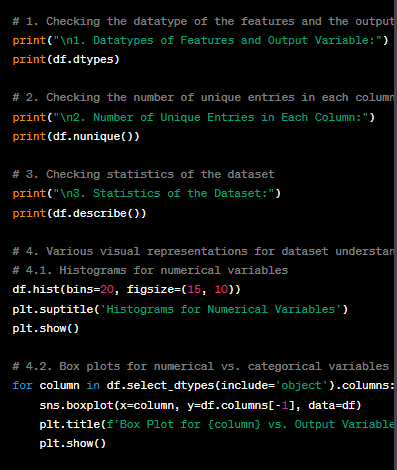


In [153]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [154]:
print(df.nunique())

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [155]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

For the next part I changed the sizes of the figueres to be clearer because the way chatgpt had them they were too small and some overlapped

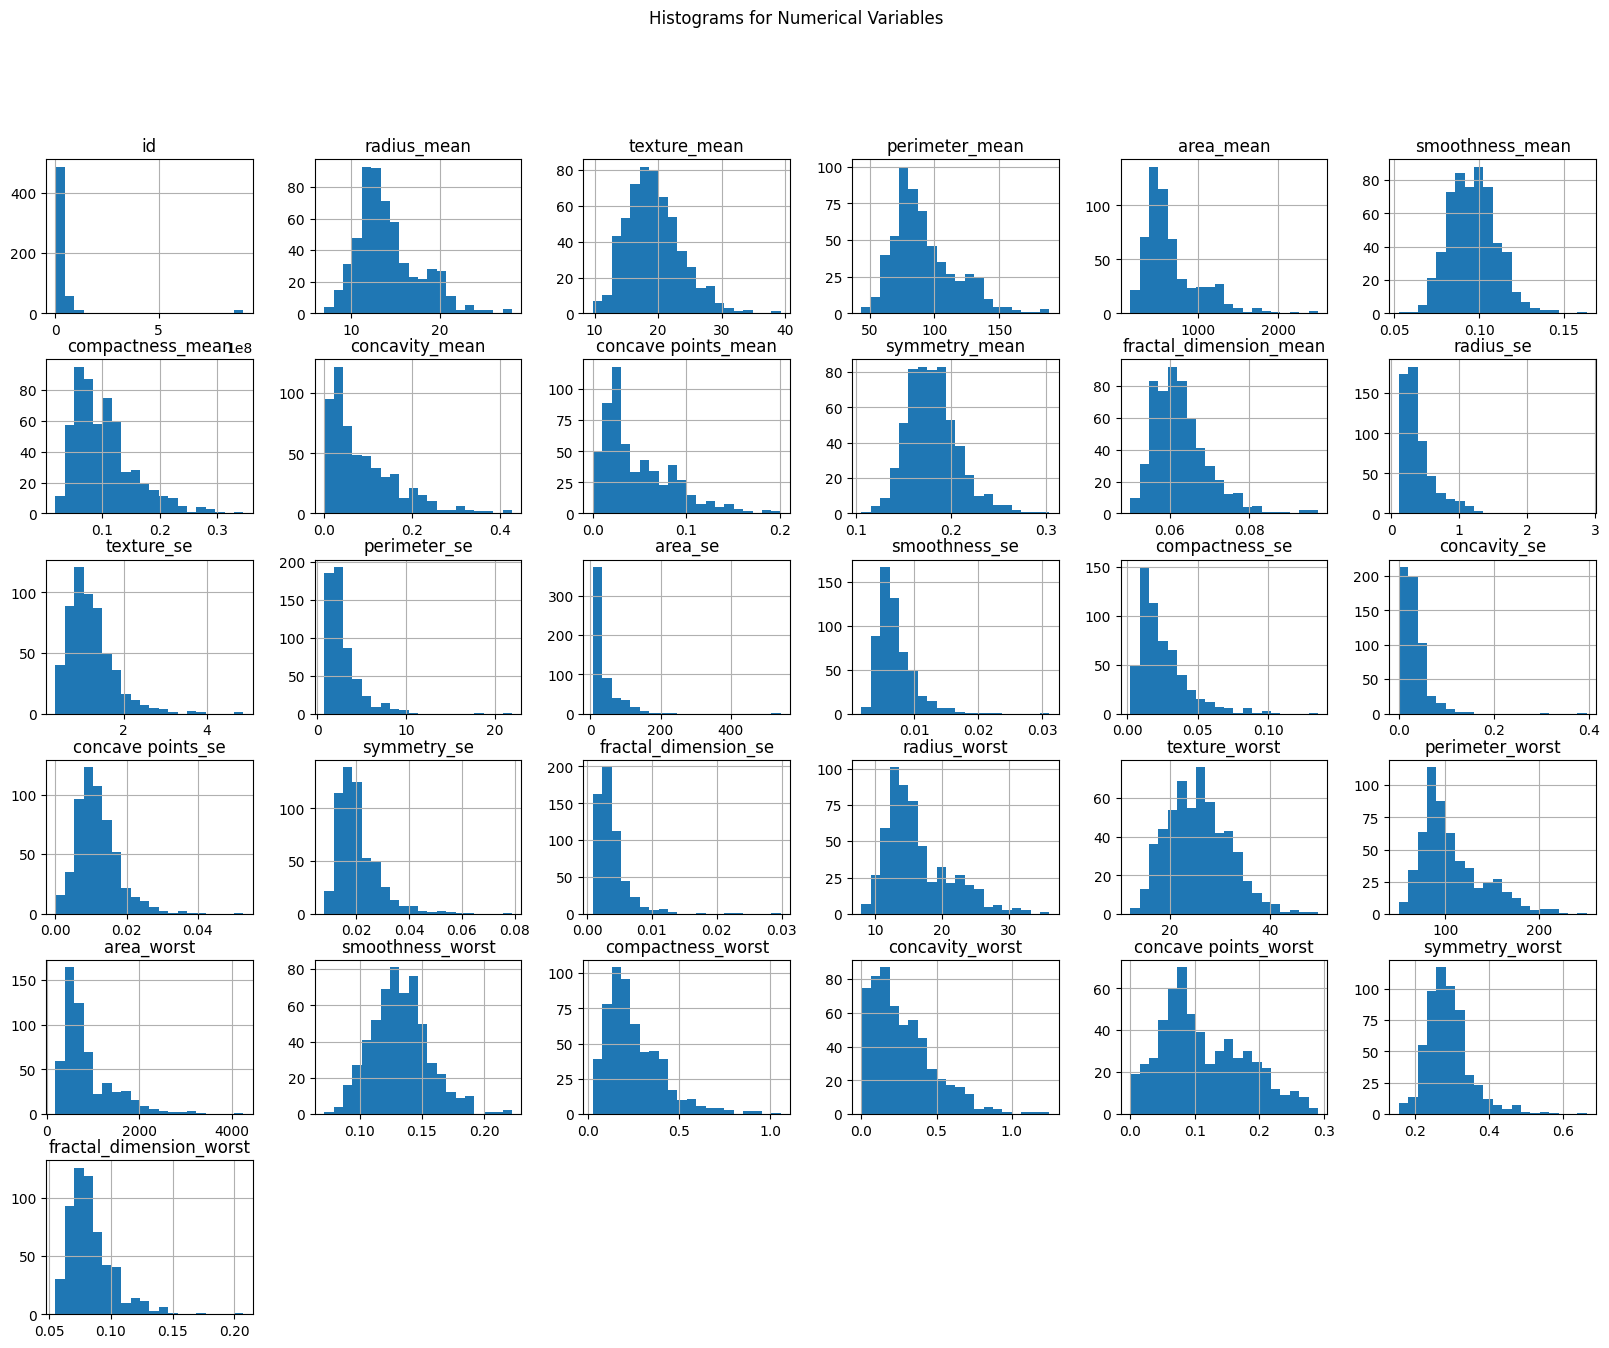

In [156]:
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

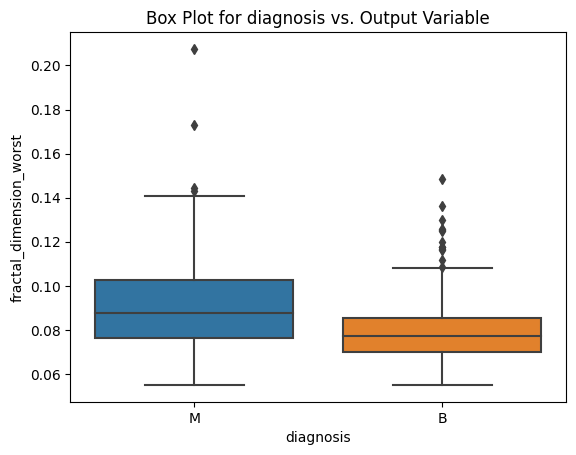

In [157]:
for column in df.select_dtypes(include='object').columns:
    sns.boxplot(x=column, y=df.columns[-1], data=df)
    plt.title(f'Box Plot for {column} vs. Output Variable')
    plt.show()

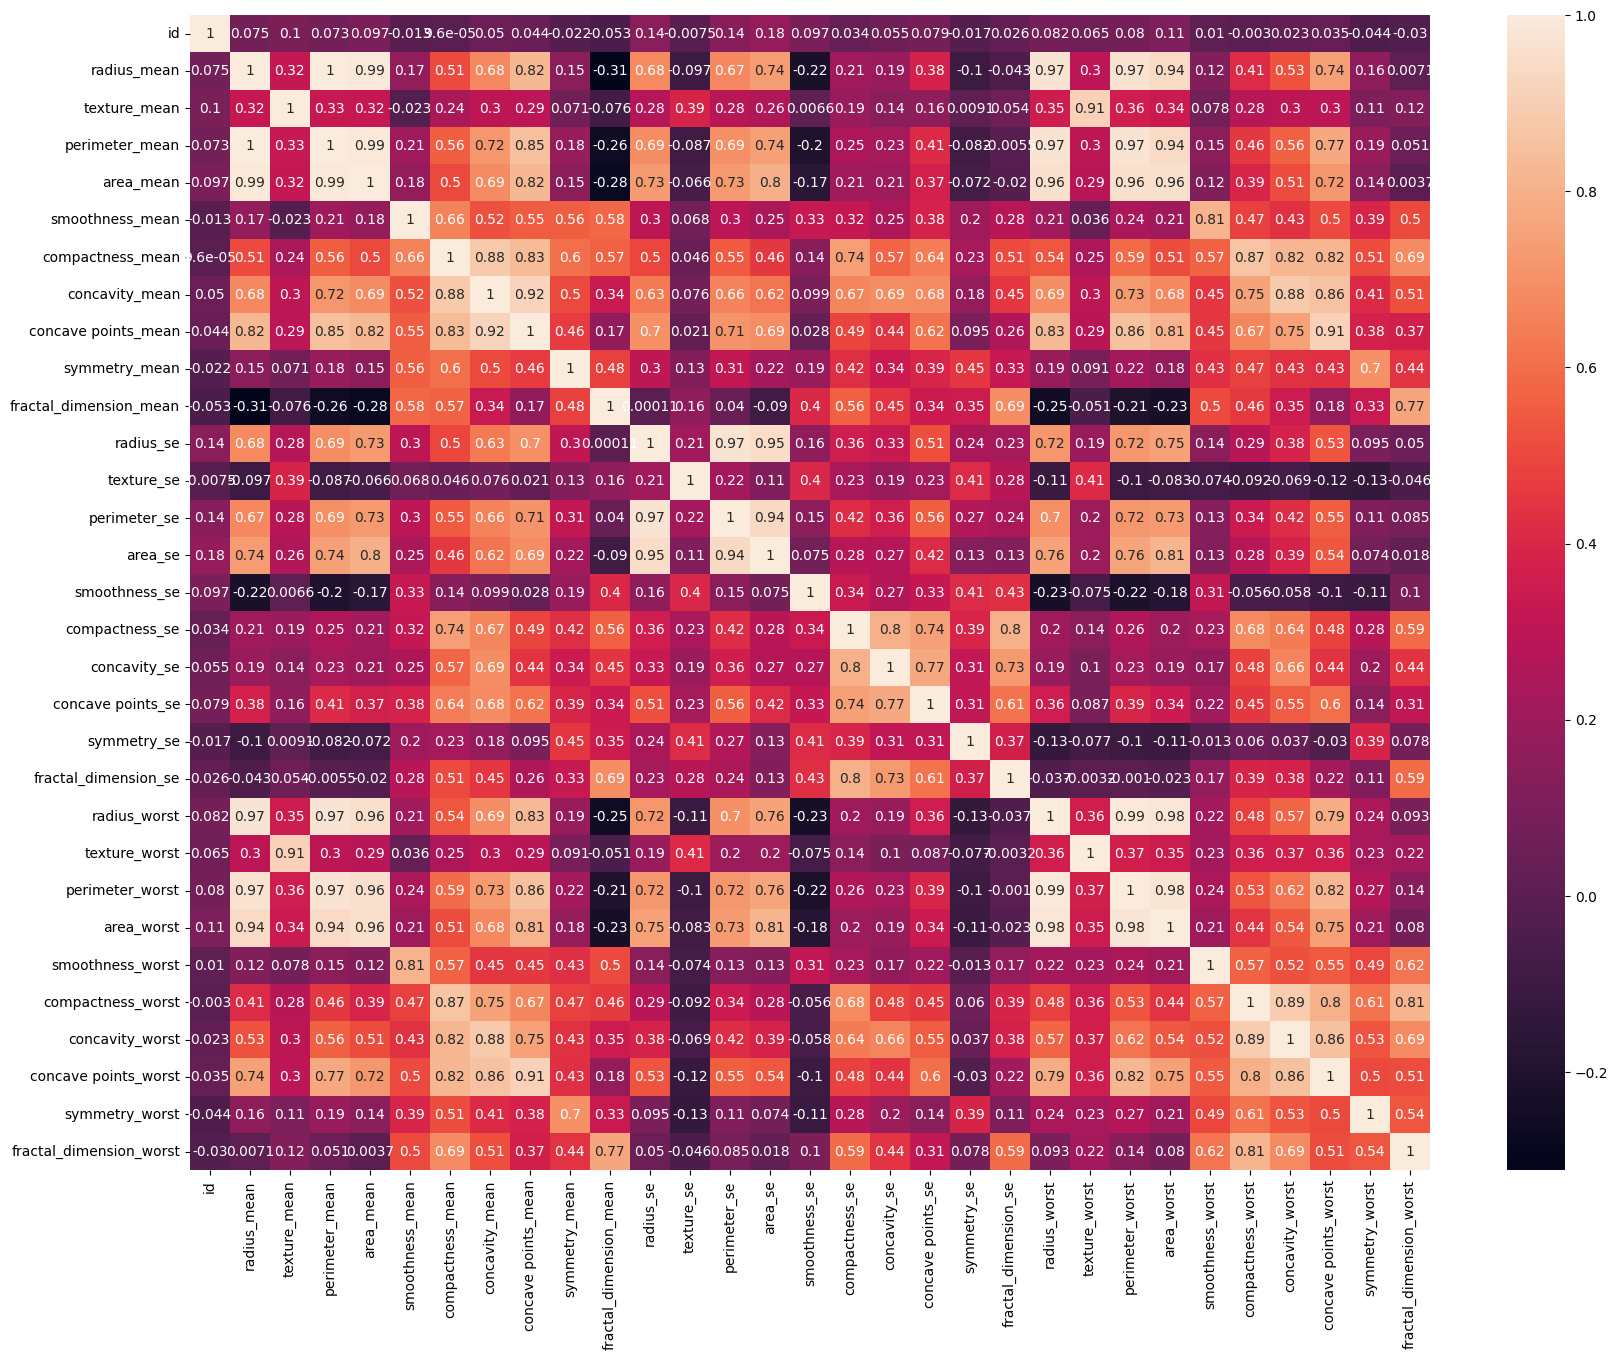

In [173]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop(columns=['diagnosis']).corr(),annot=True)
plt.show()

### **4) Data Preprocessing:**

Checking if the dataset is balanced

In [159]:
print('Noncancerous Cases', (df['diagnosis'].value_counts()['B']))
print('Cancerous Cases', (df['diagnosis'].value_counts()['M']))
print('Total number of records in the dataset:', len(df))

Noncancerous Cases 357
Cancerous Cases 212
Total number of records in the dataset: 569


Since we got M as 212 and B as 357 that means that the data set is not balanced

Bar graph for visual representaion

<Axes: xlabel='diagnosis', ylabel='count'>

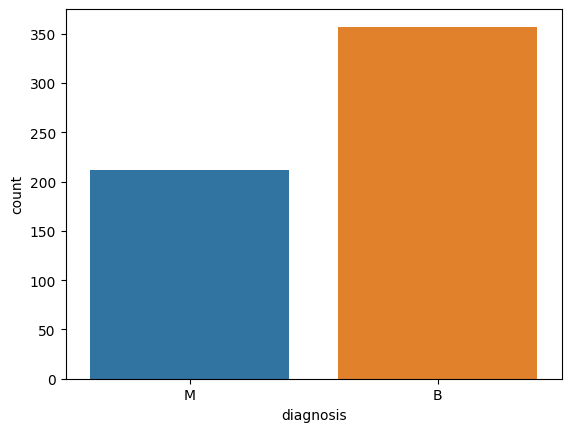

In [160]:
sns.countplot(data=df, x='diagnosis')

Balanced the dataset by increasing the number of samples in the minclass, matching it with the max class through upsampling with replacement.

In [161]:
from sklearn.utils import resample
df_max = df[df['diagnosis'] == 'B']
df_min = df[df['diagnosis'] == 'M']
df_min_upsampled = resample(df_min,replace=True,n_samples=len(df_max),random_state=42)
df_balanced = pd.concat([df_max, df_min_upsampled])

We have a balanced dataset now to check:

In [162]:
print('Noncancerous Cases', (df_balanced['diagnosis'].value_counts()['B']))
print('Cancerous Cases', (df_balanced['diagnosis'].value_counts()['M']))
print('Total number of records in the dataset:', len(df_balanced))

Noncancerous Cases 357
Cancerous Cases 357
Total number of records in the dataset: 714


In [163]:
def find_nulls(data:pd.DataFrame) -> pd.DataFrame:
    temp = {'columns':[],'nulls':[],'nulls_%':[],'unique':[]}
    nulls = data.isnull().sum()
    temp['columns'] = nulls.axes[0]
    temp['nulls'] = nulls.values
    temp['nulls_%'] = nulls.values*100/data.shape[0]
    for i in nulls.axes[0]:
        temp['unique'].append(data[i].unique().shape[0])
    temp = pd.DataFrame(temp)
    return temp.sort_values('nulls')
find_nulls(df_balanced)

,columns,nulls,nulls_%,unique
0,id,0,0.0,519
29,concave points_worst,0,0.0,448
28,concavity_worst,0,0.0,492
27,compactness_worst,0,0.0,483
26,smoothness_worst,0,0.0,380
25,area_worst,0,0.0,498
24,perimeter_worst,0,0.0,474
23,texture_worst,0,0.0,474
22,radius_worst,0,0.0,418
21,fractal_dimension_se,0,0.0,498


In [164]:
def anova(df_balanced: pd.DataFrame, cols: list, output: str) -> None:
    for col in cols:
        SSB, SSW = 0, 0
        mean = df_balanced[col].mean()

        for i in df_balanced[output].unique():
            temp = df_balanced[df_balanced[output] == i][col]
            SSB += temp.shape[0] * (mean - temp.mean())**2
            SSW += np.sum((temp - temp.mean())**2)

        db = df_balanced[output].unique().shape[0] - 1
        dw = df_balanced[col].shape[0] - df_balanced[output].unique().shape[0]

        critical = (SSB / db) / (SSW / dw)

        if critical < f.ppf(0.95, db, dw):
            print("Failed to reject null hypothesis between", col, 'and', output)

# Example usage
columns_of_interest = ['area_mean', 'perimeter_mean', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se']
output_column = 'diagnosis'
anova(df_balanced, df_balanced.columns.drop(columns_of_interest).drop(output_column), output_column)

Failed to reject null hypothesis between fractal_dimension_mean and diagnosis
Failed to reject null hypothesis between texture_se and diagnosis
Failed to reject null hypothesis between smoothness_se and diagnosis
Failed to reject null hypothesis between symmetry_se and diagnosis


In [165]:
# Columns for ANOVA
anova_cols = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']

# Initialize RandomForestClassifier
base = RandomForestClassifier(max_features='sqrt')

# Fit the model
features = df_balanced[df_balanced.columns.drop(anova_cols).drop('diagnosis')].to_numpy()
target = df_balanced['diagnosis'].to_numpy()
base.fit(features, target)

RandomForestClassifier()

In [166]:
from sklearn.model_selection import train_test_split

annova_cols = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se']
cols = ['area_mean', 'perimeter_mean', 'area_worst', 'perimeter_worst', 'perimeter_se', 'area_se']
df_balanced['diagnosis'] = df_balanced['diagnosis'].map({'M': 1, 'B': 0})

# Drop specified columns from the DataFrame
x = df_balanced.drop(cols + annova_cols + ['diagnosis'], axis=1)
y = df_balanced['diagnosis']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)

print(x_train)


          id  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
89    861598       14.640         15.24          0.11320           0.13390   
111    86408       12.630         20.76          0.09933           0.12090   
110   864033        9.777         16.99          0.10370           0.08404   
157  8711216       16.840         19.46          0.07445           0.07223   
315   894089       12.490         16.85          0.08511           0.03834   
..       ...          ...           ...              ...               ...   
154  8711002       13.150         15.34          0.09384           0.08498   
222  8812844       10.180         17.53          0.10610           0.08502   
456  9112366       11.630         29.29          0.09357           0.08574   
1     842517       20.570         17.77          0.08474           0.07864   
216  8811523       11.890         18.35          0.09363           0.11540   

     concavity_mean  concave points_mean  symmetry_mean  radius

### **5) Model Training**

Trains multiple machine learning models (Decision Tree, Random Forest, Logistic Regression, and K-Nearest Neighbors) with hyperparameter tuning using GridSearchCV and then evaluates their performance on test data, including generating ROC curves, confusion matrices, log loss, classification reports, and accuracy scores for each model.

In [167]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class AdaBoost:
    def __init__(self, n_estimators: int) -> None:
        self.stumps, self.alphas, self.errors = [], [], []
        self.n_estimators = n_estimators

    def _calculate_error(self, weights: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> float:
        return np.sum(np.not_equal(y, y_pred) * weights) / np.sum(weights)

    def _calculate_alpha(self, error: float) -> float:
        return 0.5 * np.log((1 - error) / error)

    def _calculate_weights(self, weights: np.ndarray, y: np.ndarray, y_pred: np.ndarray, alpha: float) -> np.ndarray:
        signs = np.where(np.not_equal(y, y_pred), 1, -1)
        return weights * np.exp(alpha * signs)

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        y_temp = np.where(y == 0, -1, y)
        self.stumps, self.alphas, self.errors = [], [], []

        weights = np.ones(x.shape[0]) / x.shape[0]

        for _ in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1)
            stump.fit(x, y_temp, sample_weight=weights)
            y_pred = stump.predict(x)
            error = self._calculate_error(weights, y_temp, y_pred)
            alpha = self._calculate_alpha(error)

            self.stumps.append(stump)
            self.errors.append(error)
            self.alphas.append(alpha)

            weights = self._calculate_weights(weights, y_temp, y_pred, alpha)

    def predict(self, x: np.ndarray) -> np.ndarray:
        preds = [self.alphas[i] * self.stumps[i].predict(x) for i in range(self.n_estimators)]
        return np.where(np.sum(preds, axis=0) >= 0, 1, 0)

    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        class_scores = np.zeros((x.shape[0], 2))
        for i in range(self.n_estimators):
            stump_pred = self.stumps[i].predict(x)
            class_scores[:, 1] += self.alphas[i] * (stump_pred == 1)
            class_scores[:, 0] += self.alphas[i] * (stump_pred == -1)
        return class_scores / np.sum(class_scores, axis=1, keepdims=True)

# Example usage
model = AdaBoost(n_estimators=150)

# Check if there are samples in the training data before calling fit
if x_train.shape[0] > 0:
    model.fit(x_train, y_train)
    accuracy = accuracy_score(y_train, model.predict(x_train))
    print(f"Training Accuracy: {accuracy}")
else:
    print("No training samples provided. Please check your training data.")


Training Accuracy: 1.0


In [168]:
accuracy_score(y_test,model.predict(x_test))

0.9674418604651163

In [169]:
skRandom = RandomForestClassifier(n_estimators=150,
                                  max_features='sqrt',
                                  min_samples_split=15,
                                  max_depth=10)
skRandom.fit(x_train,y_train)
accuracy_score(y_train,skRandom.predict(x_train))

0.9979959919839679

### **6) Reporting**



In [170]:
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
base.fit(X_train, y_train)

# Make predictions
y_pred = base.predict(X_test)

# Report metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.9580
Classification Report:
              precision    recall  f1-score   support

           B       0.99      0.94      0.96        81
           M       0.92      0.98      0.95        62

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



The model's performance appears to be quite successful based on the provided scores.

1. Accuracy: 0.9580
* The accuracy of 95.8% suggests that the model correctly predicted the class
labels for the majority of the samples in the test set.

2. Precision, Recall, and F1-Score:

* Class 'B' (Benign):
  * Precision: 100% — This indicates that when the model predicted a sample to be 'B,' it was correct every time.
  * Recall: 93% — This suggests that the model identified 93% of all actual 'B' samples.
  * F1-Score: 96% — The harmonic mean of precision and recall indicates a
  balance between the two metrics.
* Class 'M' (Malignant):
  * Precision: 91% — When the model predicted a sample to be 'M,' it was  
   correct 91% of the time.
  * Recall: 100% — The model successfully identified all actual 'M' samples.
  * F1-Score: 95% — A balance between precision and recall.
3. Support:

 * The support column indicates the number of actual occurrences of each class in the test set.
 * There were 81 samples of class 'B' and 62 samples of class 'M.'
4. Macro and Weighted Averages:

 * Macro Avg (average): 96% — The average of precision, recall, and F1-score across both classes.
 * Weighted Avg (average): 96% — This considers the number of samples in each class, providing an overall weighted average of the metrics.

In summary, the model achieved high accuracy and performed well in distinguishing between the 'B' (Benign) and 'M' (Malignant) classes. The balance between precision and recall for both classes, as reflected in the F1-Scores, indicates a robust and effective model.